<a href="https://colab.research.google.com/github/Geracruz/projects_portfolio/blob/main/real_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías



In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Obtener datos

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv")
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Análisis exploratorio

In [5]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
data['year'] = data['transaction_date'].astype(str).str.slice(stop=4)
data['month'] = data['transaction_date'].astype(str).str.slice(start=4)
data.head()


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,.917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,.917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,.583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,.5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,.833


Se generó la columna mes y año a partir de transaction_date, los primeros 4 dígitos corresponden al año y a partir del 4 dígito corresponde al mes, indicado mediante una fracción (núm del mes/12).

In [8]:
data['month']=round(data['month'].astype(float)*12)
data.loc[data['month']==0, 'month']=12


Para transformar la fracción en número, se multiplica por 12 y se redondea al entero más cercano. De acuerdo a la documentación, Junio equivale a .5 (6to mes) y Marzo a .25 (tercer mes), por lo que enero debe ser el mes 1. Como no hay mes 12, se toma diciembre como el mes 0 y se cambia el valor de las filas que contengan 0 por 12.

In [9]:
data[['month','year']]=data[['month','year']].astype(int)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


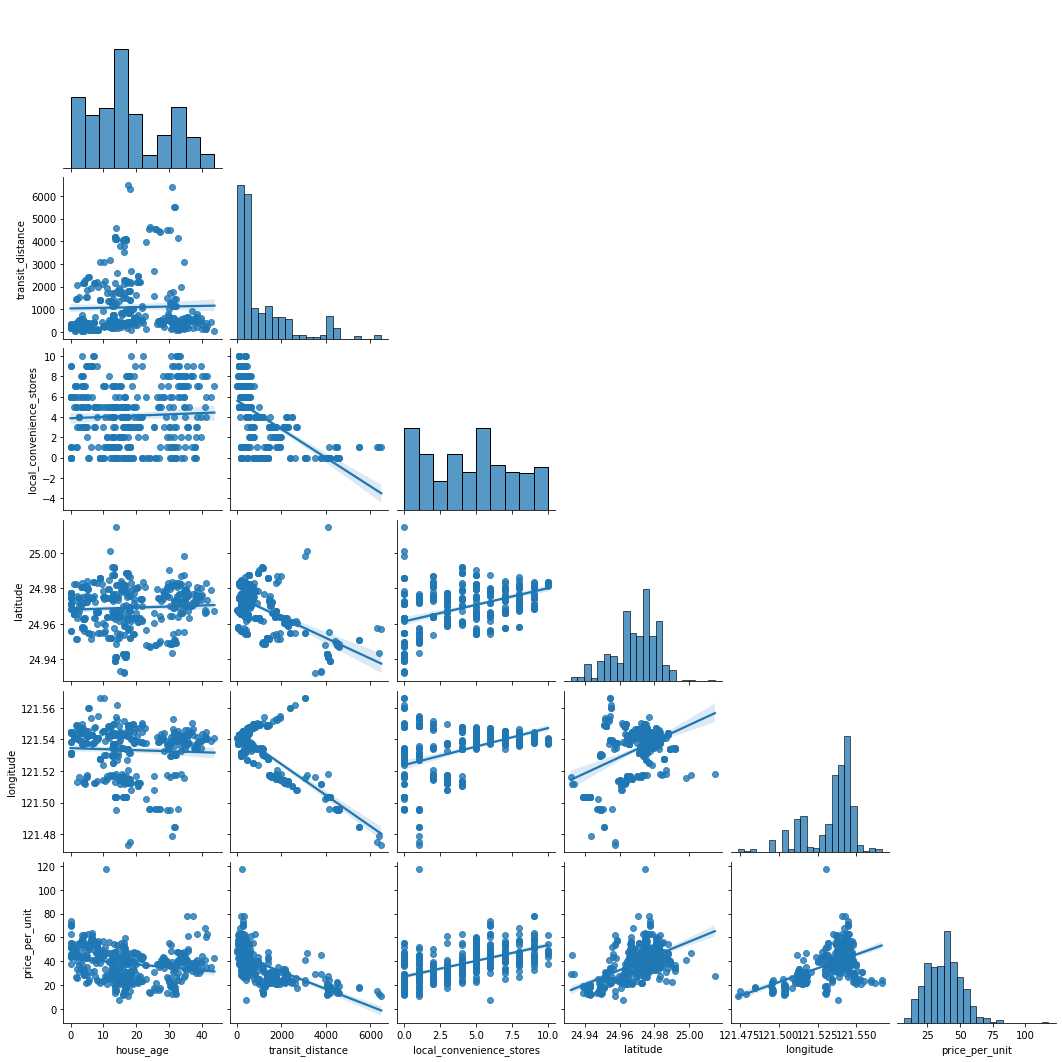

In [10]:
sns.pairplot(data.iloc[:,1:-2] , corner= True, kind = "reg")

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

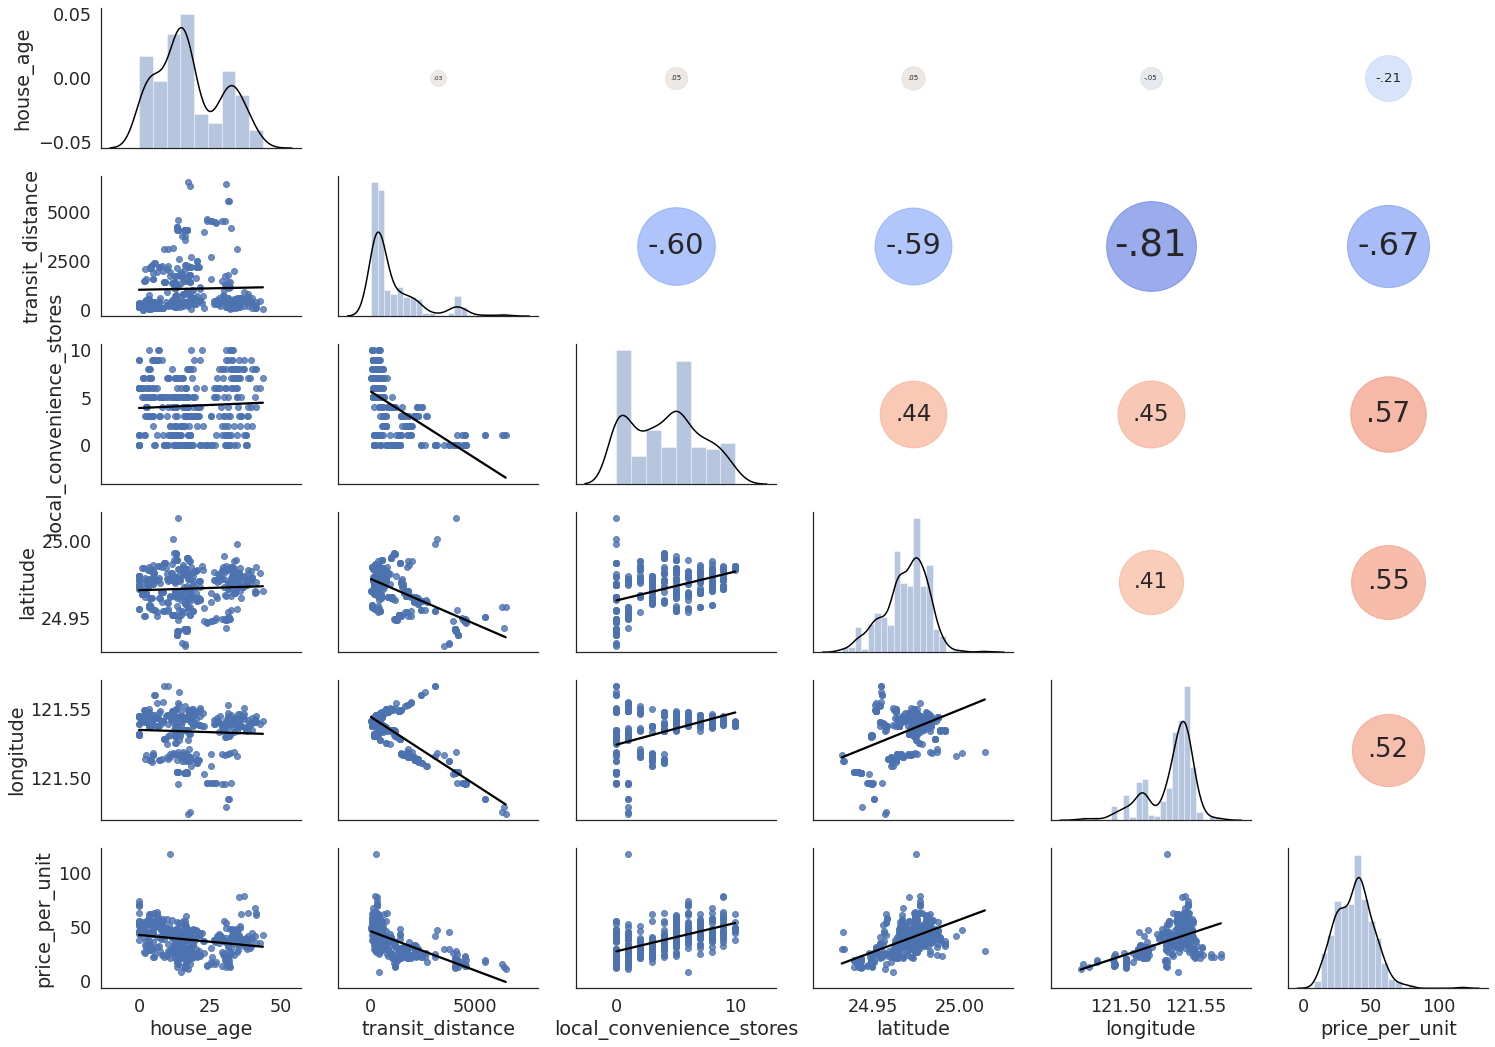

In [11]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(data.iloc[:,1:-2], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=False, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

Las variables transit distance y longitude presentan el coeficiente de correlación más alto. 

Parece que la variable house age no presenta ninguna relación lineal con el resto de variables, pues sus coeficientes sonmuy bajos.

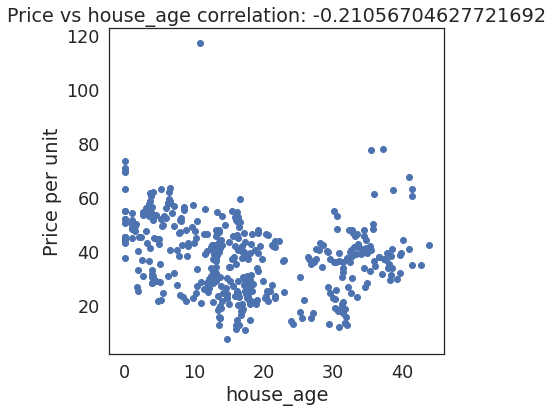

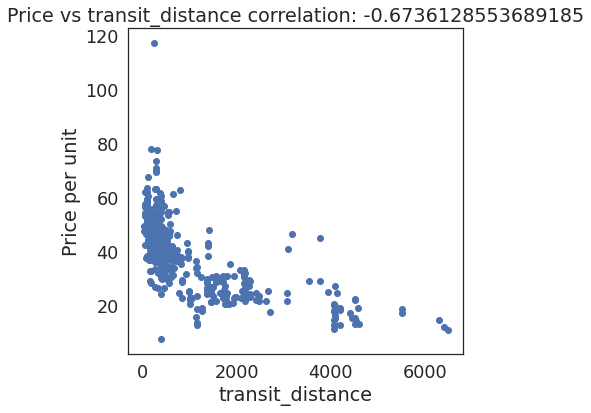

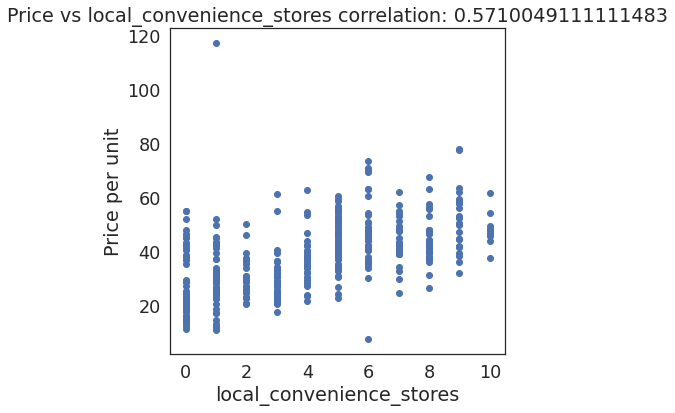

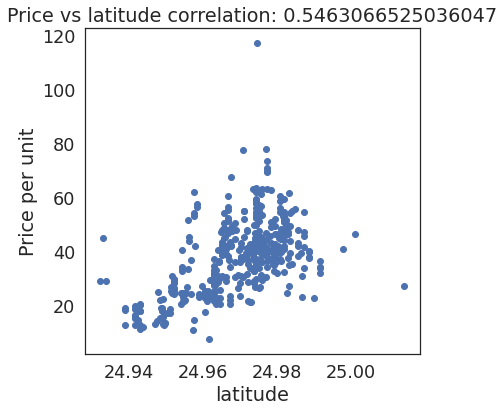

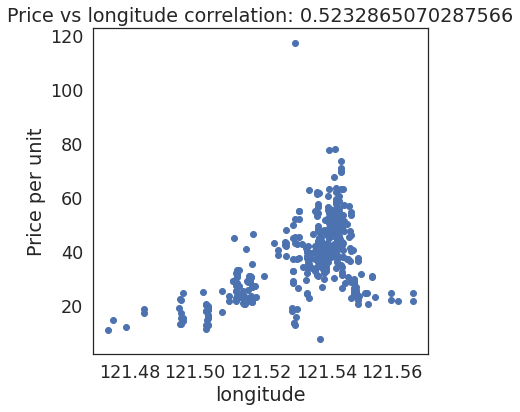

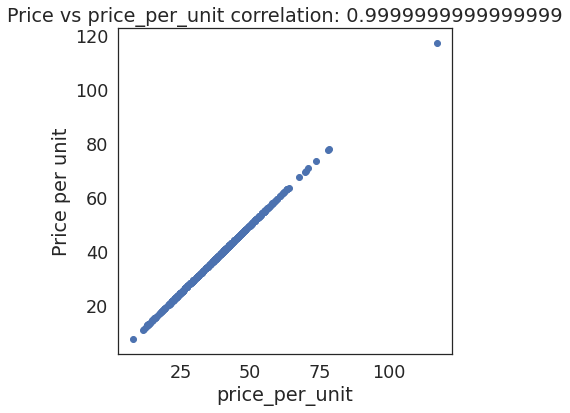

In [12]:
numeric_features= data.iloc[:,1:-2]
for col in numeric_features:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('Price vs ' + col + ' correlation: ' + str(correlation))
plt.show()


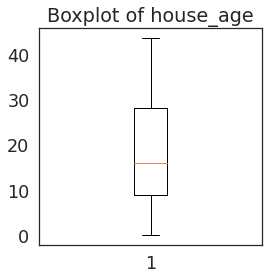

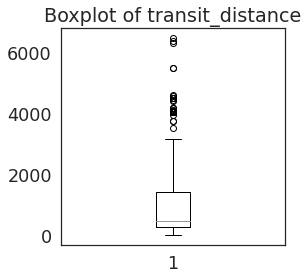

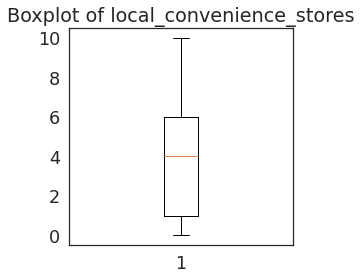

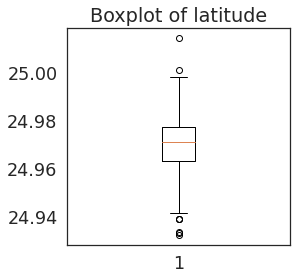

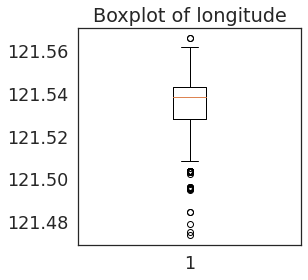

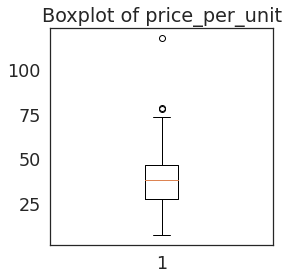

In [13]:
numeric_features= data.iloc[:,1:-2]
for col in numeric_features:
    fig = plt.figure(figsize=(4, 4))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    #correlation = feature.corr(label)
    plt.boxplot(feature)
    #plt.xlabel(col)
    #plt.ylabel('Price per unit')
    ax.set_title('Boxplot of ' + col )
plt.show()


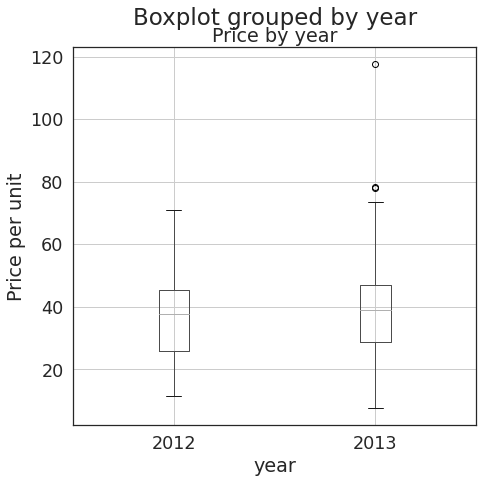

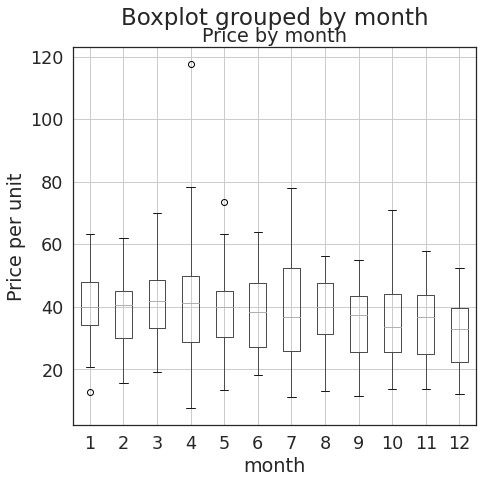

In [23]:
categorical_features=data[['year','month']]

for col in categorical_features:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Price by ' + col)
    ax.set_ylabel("Price per unit")

plt.show()

**Ajustar modelos**

In [29]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'year', 'month'],
      dtype='object')

In [32]:
X= data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude', 'year', 'month']]
Y= data['price_per_unit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print ('Training Set: %d muestras\nTest Set: %d muestras' % (X_train.shape[0], X_test.shape[0]))

Training Set: 331 muestras
Test Set: 83 muestras


**Crear una función para evaluar el comportamiento del modelo**

In [65]:
def evaluacion(modelo, X_test, Y_test):
  predictions=modelo.predict(X_test)

  %matplotlib inline

  plt.scatter(y_test, predictions)
  plt.xlabel('Valor real')
  plt.ylabel('Valor predicho')
  plt.title('Ajuste del modelo')

  #calcular metricas
  mse = round( mean_squared_error(y_test, predictions), 2)
  rmse = round( np.sqrt(mse) , 2)
  r2 = round( r2_score(y_test, predictions), 2)

  #integrarlas a la grafica


  plt.text(90, 50, 'MSE:'+ str(mse), fontsize = 15)
  plt.text(90, 40, 'RMSE:'+ str(rmse), fontsize = 15)
  plt.text(90, 30, 'R cuadrada:'+ str(r2), fontsize = 15)

  # overlay the regression line
  z = np.polyfit(y_test, predictions, 1)
  p = np.poly1d(z)
  plt.plot(y_test,p(y_test), color='magenta')
  plt.show()

**Regresión lineal**

In [57]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression().fit(X_train, y_train)


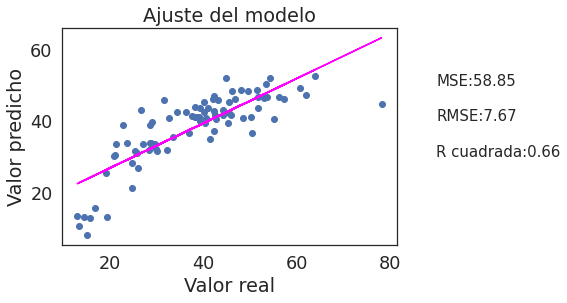

In [66]:
evaluacion(model_reg, X_test,y_test)

**Regresión lasso**

In [63]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model_lasso = Lasso().fit(X_train, y_train)

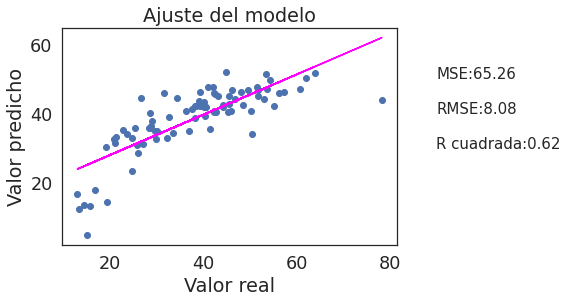

In [67]:
evaluacion(model_lasso, X_test,y_test)

**Árbol de decisión**

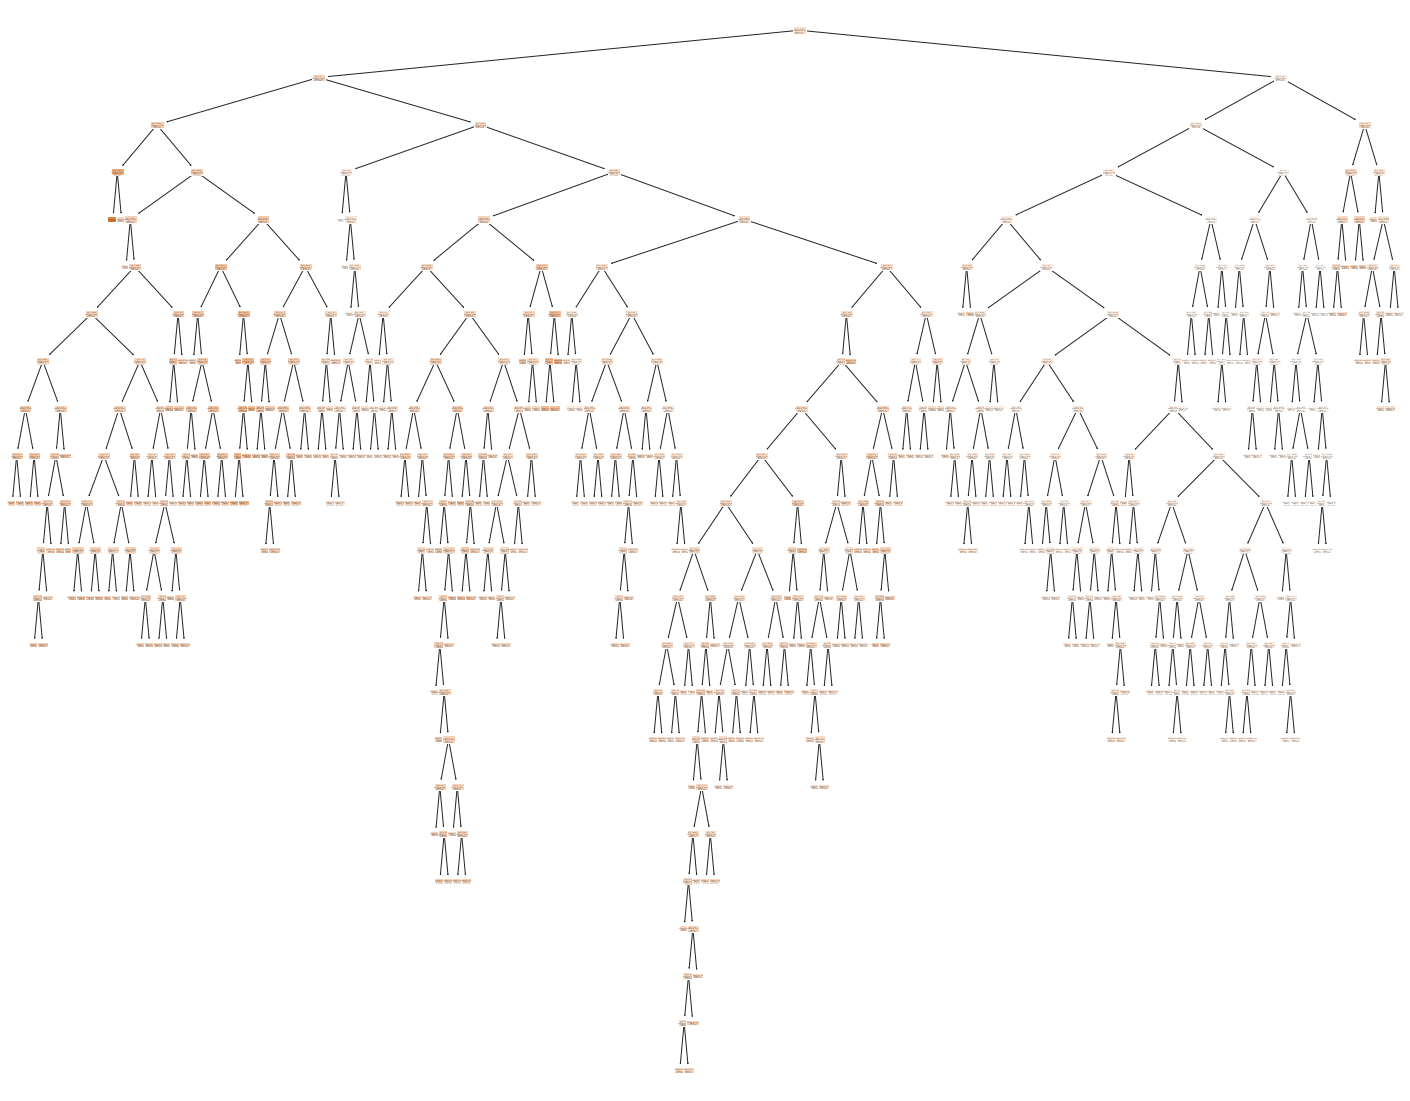

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model_arbol = DecisionTreeRegressor().fit(X_train, y_train)

from sklearn import tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_arbol, filled=True)

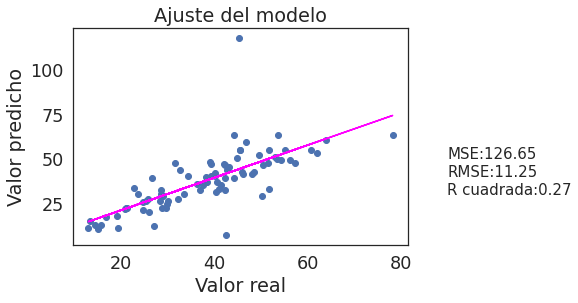

In [71]:
evaluacion(model_arbol, X_test,y_test)

**Random forest**

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor().fit(X_train, y_train)

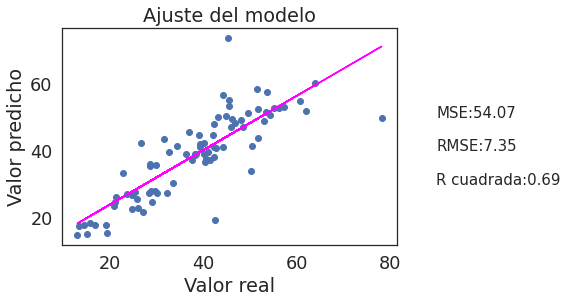

In [74]:
evaluacion(model_rf, X_test,y_test)

**Gradient boosting**

In [77]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model_gbr = GradientBoostingRegressor().fit(X_train, y_train)

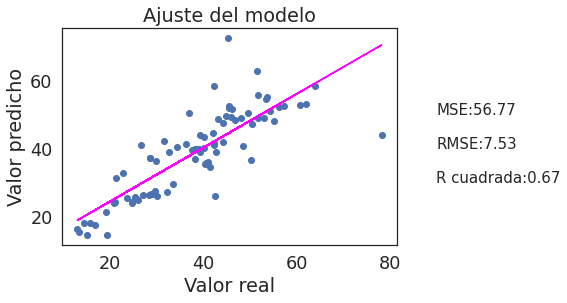

In [78]:
evaluacion(model_gbr, X_test,y_test)

**Tuneo de los hiperparámetros**

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Hiperparametros
params = {
 'learning_rate': [0.05, 0.1,.25, 0.5, .75, 1.0],
 'n_estimators' : [50, 100, 150, 200, 500, 1000]
 }

# Optimizar el valor de r cuadrada
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model_gbr_tuned=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.05, 'n_estimators': 100} 

RandomForestRegressor() 



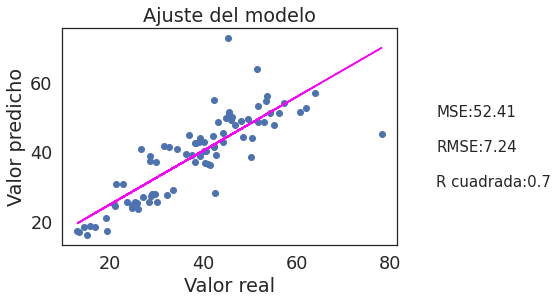

In [84]:
evaluacion(model_gbr_tuned, X_test,y_test)

**Con preprocesamiento de los datos**

Gradient boosting regressor

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [ 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude',
       'year']
numeric_transformer = Pipeline(steps=[ ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = ['month']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[  ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model_gbr_preprocessed = pipeline.fit(X_train, (y_train))
print (model_gbr_preprocessed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude', 'longitude',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month'])])),
                ('regressor', GradientBoostingRegressor())])


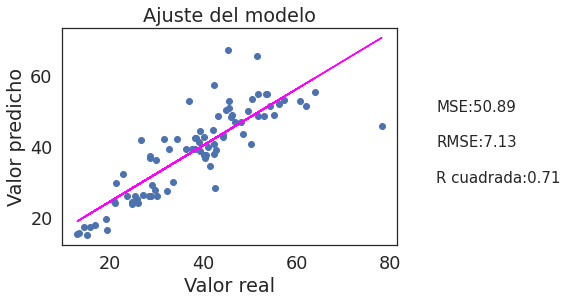

In [89]:
evaluacion(model_gbr_preprocessed, X_test,y_test)

Random forest

In [96]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model_rf_preproc = pipeline.fit(X_train, (y_train))
print (model_rf_preproc, "\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude', 'longitude',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month'])])),
                ('regressor', RandomForestRegressor())]) 



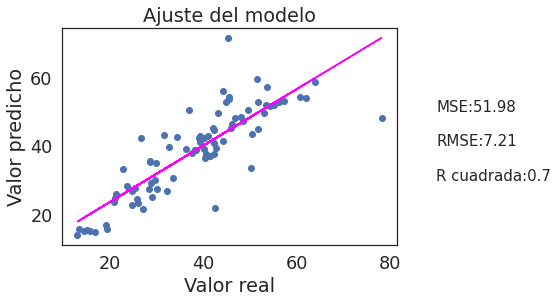

In [97]:
evaluacion(model_rf_preproc, X_test,y_test)

El modelo con mejores resultados observados fue el GBR con preprocesamiento de datos, ya que fue el obtuvo el mayor valor de R^2 y el menor de RMSE.

Guardar el modelo

In [99]:
import joblib


filename = './bike-share.pkl'
joblib.dump(model_gbr_preprocessed, filename)

['./bike-share.pkl']

Llamar al modelo

In [106]:
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
#X_new = np.array([[16.5, 2288.0110, 3 ,	24.95885,	121.51359,	2013,	6]]).astype(float)
#print ('New sample: {}'.format(list(X_new[0])))

new = [{'house_age	transit_distance': 16.5, 'local_convenience_stores': 3, 'latitude': 24.95885, 'longitude': 121.51359, 'year': 2013,'month': 1}]
w = pd.DataFrame(data)      

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(w)
print('Predicción del precio por unidad: {:.0f} '.format(np.round(result[0])))

Predicción del precio por unidad: 42 


In [98]:
X_train.head()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,year,month
302,16.5,2288.0110,3,24.95885,121.51359,2013,6
20,4.5,2275.8770,3,24.96314,121.51151,2013,5
303,38.3,439.7105,0,24.97161,121.53423,2013,6
142,19.8,640.6071,5,24.97017,121.54647,2013,5
14,13.2,1164.8380,4,24.99156,121.53406,2013,6
